In [1]:
%env PYART_QUIET=true

env: PYART_QUIET=true


In [3]:
cd data/01

/Users/tuphamminh/Documents/GitHub/MF-Airflow/data/01


In [4]:
!ls

NHB230601000008.RAWLGZV NHB230601080008.RAWLHA1 NHB230601160008.RAWLHL7
NHB230601000304.RAWLGZZ NHB230601080303.RAWLHA5 NHB230601160303.RAWLHLB
NHB230601001008.RAWLH02 NHB230601081008.RAWLHA8 NHB230601161007.RAWLHLE
NHB230601001302.RAWLH06 NHB230601081302.RAWLHAC NHB230601161304.RAWLHLJ
NHB230601002007.RAWLH09 NHB230601082008.RAWLHAF NHB230601162007.RAWLHLM
NHB230601002304.RAWLH0D NHB230601082304.RAWLHAK NHB230601162304.RAWLHLS
NHB230601003007.RAWLH0G NHB230601083008.RAWLHAN NHB230601163009.RAWLHLV
NHB230601003302.RAWLH0L NHB230601083303.RAWLHAT NHB230601163304.RAWLHLZ
NHB230601004008.RAWLH0P NHB230601084008.RAWLHAW NHB230601164007.RAWLHM2
NHB230601004303.RAWLH0U NHB230601084303.RAWLHB0 NHB230601164303.RAWLHM6
NHB230601005008.RAWLH0X NHB230601085007.RAWLHB3 NHB230601165008.RAWLHM9
NHB230601005302.RAWLH11 NHB230601085303.RAWLHB7 NHB230601165302.RAWLHMD
NHB230601010007.RAWLH14 NHB230601090007.RAWLHBA NHB230601170008.RAWLHMG
NHB230601010303.RAWLH18 NHB230601090303.RAWLHBE NHB230601170304.

In [5]:
import os
import glob
import numpy as np
import xarray as xr
import netCDF4 as nc
from tqdm import tqdm
from matplotlib import pyplot as plt
import wradlib as wrl
from matplotlib.widgets import Cursor 
import matplotlib
import datetime
import pathlib
import cartopy
import pandas as pd

In [6]:
MAP_PROJECTION = cartopy.crs.Mercator()

# Read radar data

In [171]:
import pyart

# Đường dẫn đến tập tin dữ liệu radar
# file_path = 'NHB230602000007.RAWLHXD'
file_path = 'NHB230601000008.RAWLGZV'

# Đọc tập tin radar
radar = pyart.io.read(file_path)

# # Hiển thị thông tin cơ bản về radar
print(radar.info())
# display = pyart.graph.RadarDisplay(radar)
# fig = plt.figure(figsize=(10, 8))
# display.plot('reflectivity', title='Reflectivity', vmin=-32, vmax=64, cmap='pyart_HomeyerRainbow')

# plt.show()
# plt.savefig('reflectivity.png')
# display = pyart.graph.RadarDisplay(radar)
# fig = plt.figure(figsize=(10, 8))
# display.plot('velocity', title='Velocity', vmin=-20, vmax=20, cmap='pyart_BuDRd18')  # Adjust parameters as needed
# plt.show()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (1389,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (1389,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	total_power:
		data: <ndarray of type: float32 and shape: (1389, 500)>
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		long_name: Total power
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	reflectivity:
		data: <ndarray of type: float32 and shape: (1389, 500)>
		units: dBZ
		

In [58]:
# radar2 = pyart.retrieve.est_rain_rate_z(radar)
# radar2

{'units': 'mm/hr',
 'standard_name': 'radar_estimated_rain_rate',
 'long_name': 'Radar estimated rain rate',
 'coordinates': 'elevation azimuth range',
 'data': masked_array(
   data=[[--, --, 0.13175496459007263, ..., --, --, --],
         [--, --, 0.7032261490821838, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],
   mask=[[ True,  True, False, ...,  True,  True,  True],
         [ True,  True, False, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],
   fill_value=1e+20,
   dtype=float32)}

In [165]:
radar_Z = wrl.trafo.idecibel(radar.fields['reflectivity']['data'].data)
# radar_Z = wrl.trafo.idecibel(radar)
R = wrl.zr.z_to_r(radar_Z, a=200.0, b=1.6)
radar.fields['reflectivity']['data'].data[:] = wrl.trafo.r_to_depth(R, 300)

In [100]:
radar.fields['reflectivity']['data'].data

array([[1.0061817e-23, 1.0061817e-23, 1.0953426e-02, ..., 1.0061817e-23,
        1.0061817e-23, 1.0061817e-23],
       [1.0061817e-23, 1.0061817e-23, 6.0715549e-02, ..., 1.0061817e-23,
        1.0061817e-23, 1.0061817e-23],
       [1.0061817e-23, 1.0061817e-23, 1.0061817e-23, ..., 1.0061817e-23,
        1.0061817e-23, 1.0061817e-23],
       ...,
       [1.0061817e-23, 1.0061817e-23, 1.0061817e-23, ..., 1.0061817e-23,
        1.0061817e-23, 1.0061817e-23],
       [1.0061817e-23, 1.0061817e-23, 1.0061817e-23, ..., 1.0061817e-23,
        1.0061817e-23, 1.0061817e-23],
       [1.0061817e-23, 1.0061817e-23, 1.0061817e-23, ..., 1.0061817e-23,
        1.0061817e-23, 1.0061817e-23]], dtype=float32)

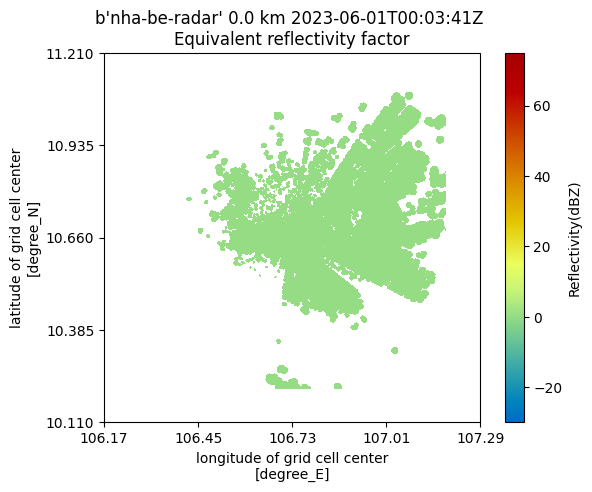

In [166]:
processed_grid = pyart.map.grid_from_radars(
    radar,
    grid_shape=(1, 1000, 1000),
    grid_limits=((0, 100), (-50_000, 50_000), (-50_000, 50_000)),
)
# data = processed_grid.fields['velocity']['data'].data[0]
fig = plt.figure()

grid_display = pyart.graph.GridMapDisplay(processed_grid)
grid_display.plot_grid(
    # "reflectivity", cmap="pyart_HomeyerRainbow", vmin=0, vmax=5,fig=fig, projection=MAP_PROJECTION
    "reflectivity", cmap="pyart_HomeyerRainbow",fig=fig, projection=MAP_PROJECTION
)


In [94]:
# a = np.array()
a = processed_grid.get_point_longitude_latitude()[1].transpose()[0]

a

array([10.20962205, 10.21052227, 10.21142248, 10.21232269, 10.2132229 ,
       10.21412311, 10.21502333, 10.21592354, 10.21682375, 10.21772396,
       10.21862417, 10.21952439, 10.2204246 , 10.22132481, 10.22222502,
       10.22312523, 10.22402545, 10.22492566, 10.22582587, 10.22672608,
       10.2276263 , 10.22852651, 10.22942672, 10.23032693, 10.23122714,
       10.23212736, 10.23302757, 10.23392778, 10.23482799, 10.2357282 ,
       10.23662842, 10.23752863, 10.23842884, 10.23932905, 10.24022926,
       10.24112948, 10.24202969, 10.2429299 , 10.24383011, 10.24473032,
       10.24563054, 10.24653075, 10.24743096, 10.24833117, 10.24923139,
       10.2501316 , 10.25103181, 10.25193202, 10.25283223, 10.25373245,
       10.25463266, 10.25553287, 10.25643308, 10.25733329, 10.25823351,
       10.25913372, 10.26003393, 10.26093414, 10.26183435, 10.26273457,
       10.26363478, 10.26453499, 10.2654352 , 10.26633541, 10.26723563,
       10.26813584, 10.26903605, 10.26993626, 10.27083648, 10.27

In [137]:
attrs = {"units": "hours since 2023-06-01 00:00:00"}

ds = xr.Dataset({"time": ("time", [0], attrs)})

xr.decode_cf(ds)

<xarray.Dataset>
Dimensions:  (time: 2)
Coordinates:
  * time     (time) datetime64[ns] 2023-06-01 2023-06-01T01:00:00
Data variables:
    *empty*

In [124]:
ds.foo[0]

<xarray.DataArray 'foo' ()>
array(0)
Coordinates:
    time     datetime64[ns] 2023-06-01

In [97]:
print(processed_grid.fields['reflectivity']['data'].data[0][:])
# print(np.expand_dims(processed_grid.fields['reflectivity']['data'].data[0][:], axis=2).shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.02981268 0.02685688 0.02246566]
 [0.         0.         0.         ... 0.03002436 0.02706308 0.01533226]
 [0.         0.         0.         ... 0.03022952 0.01533226 0.01533226]]


In [167]:
# create data
import dask.array as da
data = da.asarray(np.expand_dims(processed_grid.fields['reflectivity']['data'].data[0][:], axis=0))
time = pd.date_range("2023-06-01 00:05:00", freq="5min",periods=1)
# time = pd.to_datetime('2023-06-01 00:00:00',
#                format='%Y-%m-%d %H:%M:%S')

# create coords
rows = processed_grid.get_point_longitude_latitude()[0][0]
cols = processed_grid.get_point_longitude_latitude()[1].transpose()[0]

# put data into a dataset
ds = xr.Dataset(
    data_vars=dict(
        pr=(["time","lon", "lat"], data, {"units":"mm"})
    ),
    coords=dict(
        lon=(["lon"], rows),
        lat=(["lat"], cols),
        time=time,
    ),
    attrs=dict(description="coords with vectors"),
)
ds

<xarray.Dataset>
Dimensions:  (time: 1, lon: 1000, lat: 1000)
Coordinates:
  * lon      (lon) float64 106.3 106.3 106.3 106.3 ... 107.2 107.2 107.2 107.2
  * lat      (lat) float64 10.21 10.21 10.21 10.21 ... 11.11 11.11 11.11 11.11
  * time     (time) datetime64[ns] 2023-06-01T00:05:00
Data variables:
    pr       (time, lon, lat) float32 dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
Attributes:
    description:  coords with vectors

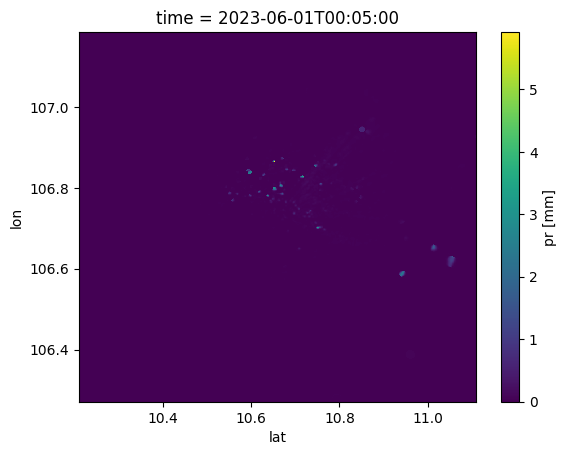

In [168]:
ds.pr[0].plot()

In [161]:
date_and_time = datetime.datetime(2023, 6, 2, 0, 0, 0)
str(date_and_time)

'2023-06-02 00:00:00'

# Gen radar data

In [173]:
import dask.array as da

# file_dir = pathlib.Path("/Users/tuphamminh/Documents/GitHub/MF-Airflow/data/01")
image_output_dir = pathlib.Path("../data/output/rainrate/01")
sigmet_glob = glob.glob("*.RAW*")
date_and_time = datetime.datetime(2023, 6, 1, 0, 0, 0)
for file in sigmet_glob:
  radar = pyart.io.read(file)
  radar_Z = wrl.trafo.idecibel(radar.fields['reflectivity']['data'].data)
  radar_R = wrl.zr.z_to_r(radar_Z, a=200.0, b=1.6)
  radar.fields['reflectivity']['data'].data[:] = wrl.trafo.r_to_depth(radar_R, 300)
  processed_grid = pyart.map.grid_from_radars(
    radar,
    grid_shape=(1, 1000, 1000),
    grid_limits=((0, 100), (-50_000, 50_000), (-50_000, 50_000)),
  )

  data = da.asarray(np.expand_dims(processed_grid.fields['reflectivity']['data'].data[0][:], axis=0))
  time = pd.date_range(str(date_and_time), freq="5min",periods=1)

  rows = processed_grid.get_point_longitude_latitude()[0][0]
  cols = processed_grid.get_point_longitude_latitude()[1].transpose()[0]

  ds = xr.Dataset(
      data_vars=dict(
          pr=(["time","lon", "lat"], data, {"units":"mm"})
      ),
      coords=dict(
          lon=(["lon"], rows),
          lat=(["lat"], cols),
          time=time,
      ),
      attrs=dict(description="coords with vectors"),
  )
  ds.pr[0].plot()
  image_new_name = str(date_and_time) + ".jpg"
  image_dir = image_output_dir / image_new_name
  plt.savefig(image_dir)
  time_change = datetime.timedelta(minutes=5)
  date_and_time = date_and_time + time_change
  plt.clf()
  

<Figure size 640x480 with 0 Axes>

In [18]:
processed_grid.fields['reflectivity']['data'].data[0].shape

(1000, 1000)

In [79]:
# new_aspect_ratio = (2, 1)
# fig, ax = plt.subplots(figsize=(10, 10)) 
# t = plt.imshow(radar2['data'].data, cmap='viridis', vmin=0.003, vmax=0.015, origin='lower', aspect='auto')
# # t = plt.imshow(radar_R,vmin=0.003, vmax=0.015, origin='lower', aspect='auto')
# plt.title('Radar Rainrate')
# plt.xlabel('lon')
# plt.ylabel('lat')
# # # ax.set_ylim(10.11, 11.21)
# # # ax.set_xlim(106.17, 107.29)  
# # # cursor = Cursor(ax, useblit = True, color ='red', 
# # #                 linewidth = 2) 
# # # ax.set_aspect(new_aspect_ratio[0] / new_aspect_ratio[1])
# # # ax.set_xticks(np.linspace(106.17, 107.29, 1000))
# # # ax.set_yticks(np.linspace(10.11, 11.21, 1000))
# # # ax.set_xticklabels(['X1', 'X2', 'X3', 'X4', 'X5'])  # Replace with your desired key values for the x-axis
# # # ax.set_yticklabels(['Y1', 'Y2', 'Y3', 'Y4', 'Y5'])  # Replace with your desired key values for the y-axis

# cb = plt.colorbar(t)
# cb.set_label("mm")
# # plt.savefig('rainrate_of_NHB230601004303.RAWLH0U_numpy_file.jpg')
# plt.show()

TypeError: 'Radar' object is not subscriptable

KeyboardInterrupt: 

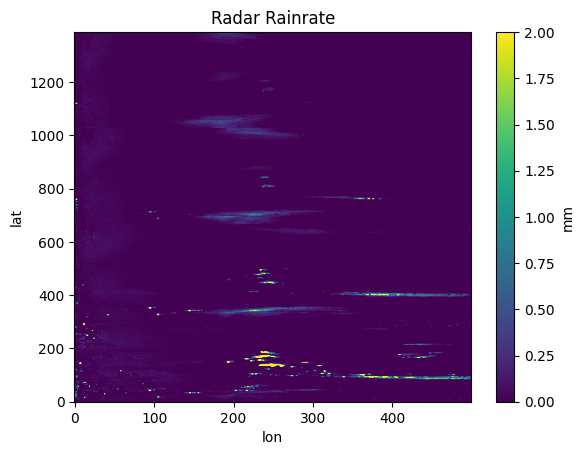

In [40]:
# sigmet_dir = pathlib.Path("/Users/tuphamminh/Documents/GitHub/MF-Airflow/data")
# sigmet_glob = sigmet_dir.glob("*.RAW*")

# image_output_dir = pathlib.Path("/Users/tuphamminh/Documents/GitHub/MF-Airflow/data/numpy/rainrate")

# date_and_time = datetime.datetime(2023, 6, 2, 0, 0, 0)
# t = plt.imshow(radar_R, cmap='viridis',vmin=0, vmax=2, origin='lower', aspect='auto')
# cb = plt.colorbar(t)
# cb.set_label("mm")
# sigmet_glob = glob.glob("*.RAW*")
# for file_path in sigmet_glob:
#   radar = pyart.io.read(file_path)
#   radar_Z = wrl.trafo.idecibel(radar.fields['reflectivity']['data'].data)
#   radar_R = wrl.zr.z_to_r(radar_Z, a=200.0, b=1.6)
#   t = plt.imshow(radar_R, cmap='viridis',vmin=0, vmax=2, origin='lower', aspect='auto')
#   plt.title('Radar Rainrate')
#   plt.xlabel('lon')
#   plt.ylabel('lat') 
#   image_new_name = str(date_and_time) + ".jpg"
#   image_dir = image_output_dir / image_new_name
#   plt.savefig(image_dir)
#   time_change = datetime.timedelta(minutes=5)
#   date_and_time = date_and_time + time_change

# Read MERRA-2

In [30]:
!ls

01    04    07    10    13    16    19    22    25    28    numpy
02    05    08    11    14    17    20    23    26    29
03    06    09    12    15    18    21    24    27    30


In [175]:
cd MERRA-2


/Users/tuphamminh/Documents/GitHub/MF-Airflow/data/MERRA-2


In [206]:
z500 = xr.open_mfdataset('3B-HHR.MS.MRG.3IMERG.20230601-S000000-E002959.0000.V07B.HDF5.nc4')
z500

<xarray.Dataset>
Dimensions:        (time: 1, lon: 71, lat: 61)
Coordinates:
  * lat            (lat) float32 7.95 8.05 8.15 8.25 ... 13.65 13.75 13.85 13.95
  * lon            (lon) float32 103.0 103.1 103.2 103.3 ... 109.8 109.9 110.0
  * time           (time) object 2023-06-01 00:00:00
Data variables:
    precipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 71, 61), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH/07;\nDOIauth...
    FileInfo:                        DataFormatVersion=7e;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2024-02-14 14:26:54 GMT Hyrax-1.16.3 htt...

In [208]:
z500 = z500.assign(rainrate=wrl.trafo.r_to_depth(z500.precipitation, 300))
z500

<xarray.Dataset>
Dimensions:        (time: 1, lon: 71, lat: 61)
Coordinates:
  * lat            (lat) float32 7.95 8.05 8.15 8.25 ... 13.65 13.75 13.85 13.95
  * lon            (lon) float32 103.0 103.1 103.2 103.3 ... 109.8 109.9 110.0
  * time           (time) object 2023-06-01 00:00:00
Data variables:
    precipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 71, 61), meta=np.ndarray>
    rainrate       (time, lon, lat) float32 dask.array<chunksize=(1, 71, 61), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH/07;\nDOIauth...
    FileInfo:                        DataFormatVersion=7e;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2024-02-14 14:26:54 GMT Hyrax-1.16.3 htt...

In [212]:
b = wrl.trafo.r_to_depth(z500.precipitation[0][:], 300)
print(z500.precipitation[0])
print(b)

<xarray.DataArray 'precipitation' (lon: 71, lat: 61)>
dask.array<getitem, shape=(71, 61), dtype=float32, chunksize=(71, 61), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 7.95 8.05 8.15 8.25 8.35 ... 13.65 13.75 13.85 13.95
  * lon      (lon) float32 103.0 103.1 103.2 103.3 ... 109.8 109.8 109.9 110.0
    time     object 2023-06-01 00:00:00
Attributes:
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr
    CodeMissingValue:  -9999.9
    LongName:          \nComplete merged microwave-infrared (gauge-adjusted)\...
    origname:          precipitation
    fullnamepath:      /Grid/precipitation
<xarray.DataArray 'precipitation' (lon: 71, lat: 61)>
dask.array<truediv, shape=(71, 61), dtype=float32, chunksize=(71, 61), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 7.95 8.05 8.15 8.25 8.35 ... 13.65 13.75 13.85 13.95
  * lon      (lon) float32 103.0 103.1 103.2 103.3 ... 109.8 109.8 109.9 110.0
    time     objec

In [209]:
nb = z500.rainrate[0].transpose('lat', 'lon')
nb = nb.assign_attrs(
    units="mm", description="Rainrate"
)
nb

<xarray.DataArray 'rainrate' (lat: 61, lon: 71)>
dask.array<transpose, shape=(61, 71), dtype=float32, chunksize=(61, 71), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 7.95 8.05 8.15 8.25 8.35 ... 13.65 13.75 13.85 13.95
  * lon      (lon) float32 103.0 103.1 103.2 103.3 ... 109.8 109.8 109.9 110.0
    time     object 2023-06-01 00:00:00
Attributes:
    units:        mm
    description:  Rainrate

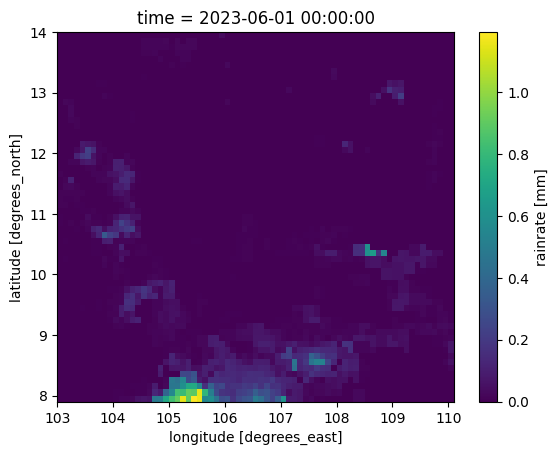

In [210]:
nb.plot()

# Gen MERRA-2 data

In [32]:
file_dir = pathlib.Path("/Users/tuphamminh/Documents/GitHub/MF-Airflow/data/MERRA-2")
image_output_dir = pathlib.Path("/Users/tuphamminh/Documents/GitHub/MF-Airflow/data/numpy/MERRA-2")
file_glob = file_dir.glob("*.*")
# t = plt.imshow(nb, cmap='viridis',vmin=0, vmax=14, origin='lower', aspect='auto')
# cb = plt.colorbar(t)
# cb.set_label("mm/hr")
date_and_time = datetime.datetime(2023, 6, 1, 0, 0, 0)
for file in file_glob:
  z500 = xr.open_mfdataset(file)
  nb = z500.precipitation[0].transpose('lat', 'lon')
  # t = plt.imshow(nb, cmap='viridis',vmin=0, vmax=14, origin='lower', aspect='auto')
  # plt.title('Radar Rainrate')
  # plt.xlabel('lon')
  # plt.ylabel('lat') 
  nb.plot()
  image_new_name = str(date_and_time) + ".jpg"
  image_dir = image_output_dir / image_new_name
  plt.savefig(image_dir)
  time_change = datetime.timedelta(minutes=30)
  date_and_time = date_and_time + time_change
  plt.clf()
  
  

<Figure size 640x480 with 0 Axes>